In [2]:
# Linear Regression
import pandas as pd                    
import matplotlib.pyplot as plt        
import seaborn as sns                  
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression      
from sklearn.metrics import mean_squared_error, r2_score  

In [16]:
df = pd.read_excel("C:/Users/Admin/Downloads/spotifysongs.csv.xlsx")

In [18]:
df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4,0.904,1,Parallel Lines,Junior Boys


In [22]:
# Checking for any missing values
print(df.isnull().sum())

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64


In [28]:
# Selecting numeric data only
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence',  'duration_ms']
X = df[features]
y = df['tempo']  #this is our target varoiable

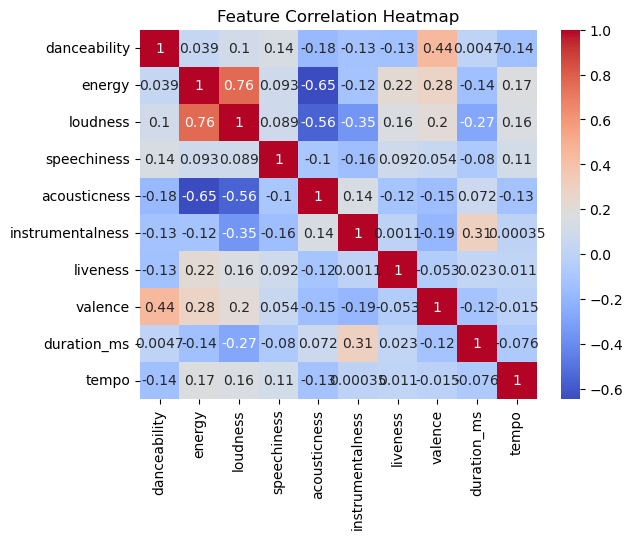

In [32]:
# Visualizing the target fetaure
sns.heatmap(df[features + ['tempo']].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

# this map shows how strong a variable is related to the target variable which is the tempo

In [34]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

# r2 score depictsw nthe accuracy of our prediction
# mse measn the avg error btwn what we have guessed and what is the actual truth
print(r2)
print(mse)

0.06295117039798148
715.2701514208811


In [46]:
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef}")
# How are the below values affecting the tempo, positive meaning the better it affects the tempo, while negative meaning the opposite

danceability: -32.39729831933984
energy: 2.289071193440962
loudness: 0.9488474431264511
speechiness: 42.05926525255977
acousticness: -6.456349857237951
instrumentalness: 10.415549876263395
liveness: -8.394340144077745
valence: 4.608086579343913
duration_ms: -8.793707179295802e-06


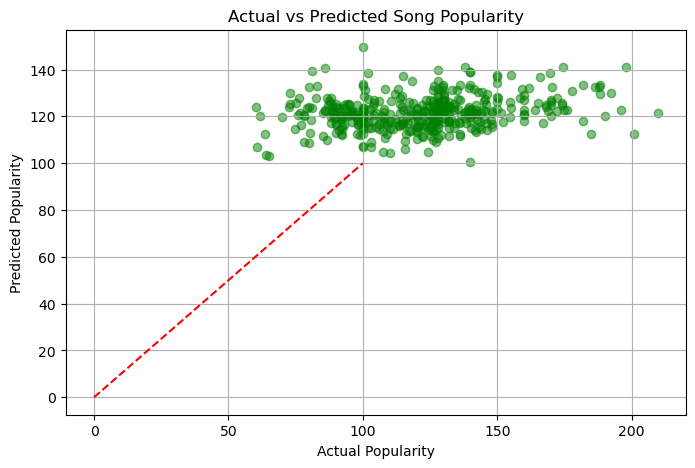

In [48]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([0, 100], [0, 100], '--r')  # Perfect prediction line
plt.xlabel("Actual Popularity")
plt.ylabel("Predicted Popularity")
plt.title("Actual vs Predicted Song Popularity")
plt.grid(True)
plt.show()